In [86]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [87]:
def create_sample_investment_data(initial_investment_amount, mu, sigma, years, samples):
    # create normal change over 40 years, samples are columns, years are rows
    rand_change_40 = 1 + np.random.normal(mu, sigma, size=(years, samples))
    """
    This gets the cumulative percentage change over the 40 year period for all
    the samples in the matrix by multiplying each year's change by the previous 
    year's cumulative change and putting the value in a new matrix
    """
    cum_rand_change_40 = rand_change_40.copy()
    for i in range(years):
        if i > 0:
            year, cum_prev_year = rand_change_40[i,:], cum_rand_change_40[i-1,:]
            cum_rand_change_40[i,:] = year*cum_prev_year
    
    return pd.DataFrame(initial_investment_amount*cum_rand_change_40)

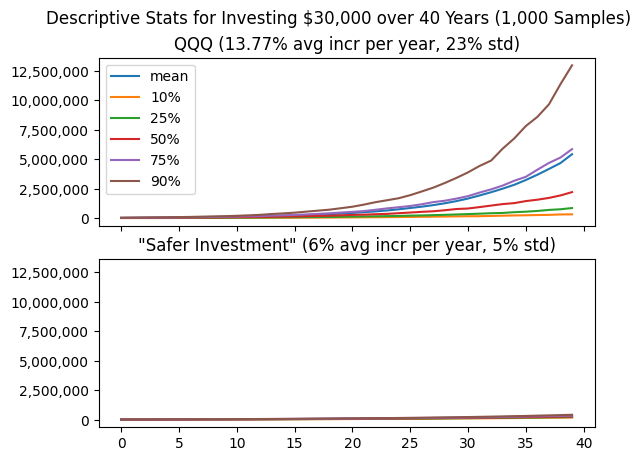

In [121]:
initial_investment_amount = 30_000
years, samples  = 40, 1_000

# QQQ normal dist (might not be the best dist)
mu_QQQ, sigma_QQQ = 0.1377, 0.23
df_QQQ = create_sample_investment_data(initial_investment_amount, mu_QQQ, sigma_QQQ, years, samples)

# "Safer investment" normal dist (might not be the best dist)
mu_safe, sigma_safe = 0.06, 0.05 
df_safe = create_sample_investment_data(initial_investment_amount, mu_safe, sigma_safe, years, samples)

# subplot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
fig.suptitle(f"Descriptive Stats for Investing ${format(initial_investment_amount, ',')} over 40 Years ({format(samples, ',')} Samples)")

# graph QQQ
ax1 = df_QQQ.T.describe(percentiles=[.10,.25,.5,.75,.90]).T[['mean','10%','25%', '50%', '75%','90%']].plot(ax=ax1)
ax1.ticklabel_format(style='plain')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_title(f'QQQ (13.77% avg incr per year, 23% std)')

# graph safe
ax2 = df_safe.T.describe(percentiles=[.10,.25,.5,.75,.90]).T[['mean','10%','25%', '50%', '75%','90%']].plot(ax=ax2, legend=False)
ax2.set_title(f'"Safer Investment" (6% avg incr per year, 5% std)')

plt.show()

### Descriptive Stats for final year amounts for investing $30,000 for 40 years

In [119]:
print('QQQ')
df_QQQ.T.describe()[[39]].round(2).apply(lambda s: s.apply('{:,}'.format))

QQQ


,39
count,"1,000.0"
mean,"4,980,564.75"
std,"8,924,898.88"
min,"6,456.09"
25%,"929,606.94"
50%,"2,167,641.78"
75%,"5,206,451.61"
max,"112,183,113.69"


In [118]:
print('"Safer Investment"')
df_safe.T.describe()[[39]].round(2).apply(lambda s: s.apply('{:,}'.format))

"Safer Investment"


,39
count,"1,000.0"
mean,"309,717.77"
std,"94,620.16"
min,"115,384.57"
25%,"242,962.94"
50%,"296,044.68"
75%,"361,986.67"
max,"751,096.66"
